In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import StackingClassifier
import seaborn as sn


In [16]:
# Specify the file path
file_path = "/Users/jameswang/workspace/genre recognition project/combined_dataset.csv"

# Load the CSV file into a DataFrame
data = pd.read_csv(file_path)

# Display the DataFrame
data

,filename,subfolder,pcm_fftMag_spectralRollOff90.0_sma_de_peakRangeAbs,voicingFinalUnclipped_sma_percentile99.0,audspec_lengthL1norm_sma_de_peakMeanMeanDist,pcm_fftMag_spectralRollOff90.0_sma_de_stddevFallingSlope,pcm_fftMag_spectralFlux_sma_percentile99.0,pcm_fftMag_spectralVariance_sma_de_peakMeanMeanDist,pcm_fftMag_spectralSkewness_sma_rqmean,pcm_fftMag_spectralFlux_sma_peakMeanAbs,...,pcm_fftMag_psySharpness_sma_de_percentile99.0,pcm_fftMag_spectralSkewness_sma_meanRisingSlope,pcm_fftMag_spectralCentroid_sma_de_peakMeanMeanDist,audSpec_Rfilt_sma_de[10]_posamean,audSpec_Rfilt_sma_de[8]_iqr2-3,mfcc_sma[3]_percentile99.0,audSpec_Rfilt_sma_de[13]_kurtosis,audSpec_Rfilt_sma_de[2]_peakMeanMeanDist,mfcc_sma[9]_quartile3,audSpec_Rfilt_sma_de[2]_rqmean
0,pop.00027.wav,pop,2380.13670,0.834691,0.318650,25708.6560,3.035781,1239042.90,7.348473,2.025218,...,0.331661,106.662740,286.817800,0.086337,0.050414,29.193144,6.045451,0.069595,0.386855,0.040971
1,pop.00033.wav,pop,2540.91800,0.894066,0.174430,15777.0760,2.237899,747992.70,3.911582,1.671087,...,0.224549,45.735607,264.359650,0.077064,0.037475,20.052576,138.367520,1.290927,6.695939,0.121687
2,pop.00032.wav,pop,2799.31640,0.890834,0.239341,29044.7190,1.835224,1961448.00,5.171356,1.344830,...,1.022570,67.027626,758.386700,0.090895,0.041338,32.733665,14.521777,0.183546,8.721083,0.071596
3,pop.00026.wav,pop,2707.44140,0.876467,0.271718,31343.5040,3.760484,1725358.80,6.914992,2.731987,...,0.365196,95.239040,465.347000,0.069729,0.037945,18.650799,11.022228,0.077338,4.587668,0.038568
4,pop.00030.wav,pop,2533.74020,0.879603,0.309510,27718.1070,3.208917,1585097.20,4.595847,2.315727,...,0.404873,46.787525,397.240020,0.064436,0.041328,17.898153,7.721614,0.057578,5.643700,0.034792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,jazz.00018.wav,jazz,862.76370,0.869087,0.068022,6719.8647,0.652970,150765.45,4.178401,0.509138,...,0.122102,55.705513,89.301260,0.062893,0.032276,22.340881,7.621940,0.067010,8.894079,0.029588
995,jazz.00032.wav,jazz,1208.73050,0.902204,0.114719,13558.1660,0.808095,340221.50,8.741702,0.545321,...,0.127320,109.714050,103.241130,0.101309,0.021977,24.983948,59.731796,0.195306,-1.103688,0.076837
996,jazz.00026.wav,jazz,953.20310,0.934563,0.048425,9106.9940,0.242512,330230.00,8.947866,0.161677,...,0.065130,65.108185,164.596000,0.050809,0.009221,32.141186,113.825610,0.509751,6.040290,0.071752
997,jazz.00027.wav,jazz,1287.68550,0.891555,0.119298,12796.8740,0.450750,272936.22,8.799055,0.324078,...,0.142041,134.035480,101.524796,0.125156,0.058766,28.519890,7.318426,0.060235,10.074498,0.039067


In [17]:
# Create a label encoder instance
label_encoder = LabelEncoder()

# Fit and transform the 'label' column
data['encoded_label'] = label_encoder.fit_transform(data['subfolder'])

# Display the DataFrame
data


,filename,subfolder,pcm_fftMag_spectralRollOff90.0_sma_de_peakRangeAbs,voicingFinalUnclipped_sma_percentile99.0,audspec_lengthL1norm_sma_de_peakMeanMeanDist,pcm_fftMag_spectralRollOff90.0_sma_de_stddevFallingSlope,pcm_fftMag_spectralFlux_sma_percentile99.0,pcm_fftMag_spectralVariance_sma_de_peakMeanMeanDist,pcm_fftMag_spectralSkewness_sma_rqmean,pcm_fftMag_spectralFlux_sma_peakMeanAbs,...,pcm_fftMag_spectralSkewness_sma_meanRisingSlope,pcm_fftMag_spectralCentroid_sma_de_peakMeanMeanDist,audSpec_Rfilt_sma_de[10]_posamean,audSpec_Rfilt_sma_de[8]_iqr2-3,mfcc_sma[3]_percentile99.0,audSpec_Rfilt_sma_de[13]_kurtosis,audSpec_Rfilt_sma_de[2]_peakMeanMeanDist,mfcc_sma[9]_quartile3,audSpec_Rfilt_sma_de[2]_rqmean,encoded_label
0,pop.00027.wav,pop,2380.13670,0.834691,0.318650,25708.6560,3.035781,1239042.90,7.348473,2.025218,...,106.662740,286.817800,0.086337,0.050414,29.193144,6.045451,0.069595,0.386855,0.040971,7
1,pop.00033.wav,pop,2540.91800,0.894066,0.174430,15777.0760,2.237899,747992.70,3.911582,1.671087,...,45.735607,264.359650,0.077064,0.037475,20.052576,138.367520,1.290927,6.695939,0.121687,7
2,pop.00032.wav,pop,2799.31640,0.890834,0.239341,29044.7190,1.835224,1961448.00,5.171356,1.344830,...,67.027626,758.386700,0.090895,0.041338,32.733665,14.521777,0.183546,8.721083,0.071596,7
3,pop.00026.wav,pop,2707.44140,0.876467,0.271718,31343.5040,3.760484,1725358.80,6.914992,2.731987,...,95.239040,465.347000,0.069729,0.037945,18.650799,11.022228,0.077338,4.587668,0.038568,7
4,pop.00030.wav,pop,2533.74020,0.879603,0.309510,27718.1070,3.208917,1585097.20,4.595847,2.315727,...,46.787525,397.240020,0.064436,0.041328,17.898153,7.721614,0.057578,5.643700,0.034792,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,jazz.00018.wav,jazz,862.76370,0.869087,0.068022,6719.8647,0.652970,150765.45,4.178401,0.509138,...,55.705513,89.301260,0.062893,0.032276,22.340881,7.621940,0.067010,8.894079,0.029588,5
995,jazz.00032.wav,jazz,1208.73050,0.902204,0.114719,13558.1660,0.808095,340221.50,8.741702,0.545321,...,109.714050,103.241130,0.101309,0.021977,24.983948,59.731796,0.195306,-1.103688,0.076837,5
996,jazz.00026.wav,jazz,953.20310,0.934563,0.048425,9106.9940,0.242512,330230.00,8.947866,0.161677,...,65.108185,164.596000,0.050809,0.009221,32.141186,113.825610,0.509751,6.040290,0.071752,5
997,jazz.00027.wav,jazz,1287.68550,0.891555,0.119298,12796.8740,0.450750,272936.22,8.799055,0.324078,...,134.035480,101.524796,0.125156,0.058766,28.519890,7.318426,0.060235,10.074498,0.039067,5


In [18]:

# Split the data into features and labels
X = data.drop(['subfolder', 'encoded_label', 'filename'], axis=1)  # Drop non-feature columns
y = data['encoded_label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




In [19]:
# Initializing the models
svm_model = SVC(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
mlp_model = MLPClassifier(random_state=42, max_iter=1000)
stacking_model = StackingClassifier(
    estimators=[('Logistic Regression', svm_model), ('Random Forest', rf_model)],
    final_estimator=RandomForestClassifier()
    )

# Training the models
svm_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train_scaled, y_train)
mlp_model.fit(X_train_scaled, y_train)
stacking_model.fit(X_train_scaled, y_train)


# Function to evaluate models
def evaluate_model(model, X_test_scaled, y_test):
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    return acc, conf_matrix

# Evaluating the models
svm_acc, svm_conf_matrix = evaluate_model(svm_model, X_test_scaled, y_test)
rf_acc, rf_conf_matrix = evaluate_model(rf_model, X_test_scaled, y_test)
mlp_acc, mlp_conf_matrix = evaluate_model(mlp_model, X_test_scaled, y_test)
stacking_acc, stacking_conf_matrix = evaluate_model(stacking_model, X_test_scaled, y_test)

# Printing the results
print("SVM accuracy:", svm_acc)
print("Random Forest accuracy:", rf_acc)
print("MLP accuracy:", mlp_acc)
print("Stacking accuracy:", stacking_acc)

SVM accuracy: 0.815
Random Forest accuracy: 0.845
MLP accuracy: 0.85
Stacking accuracy: 0.845


<function matplotlib.pyplot.show(close=None, block=None)>

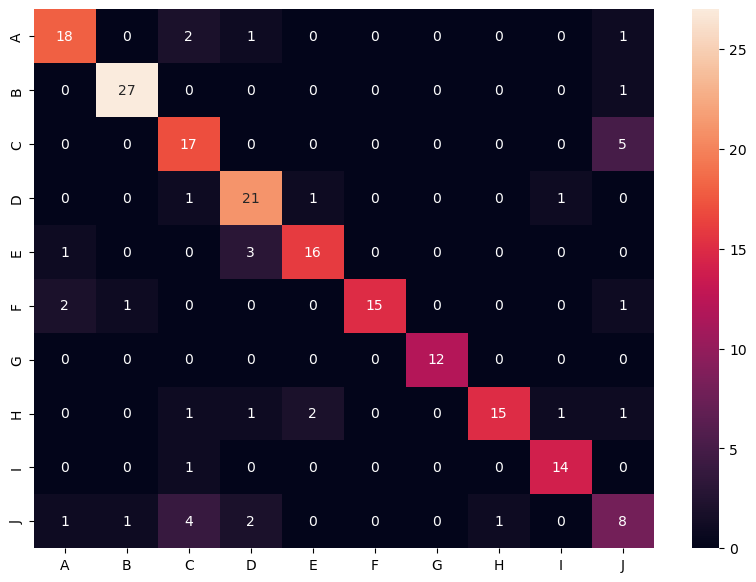

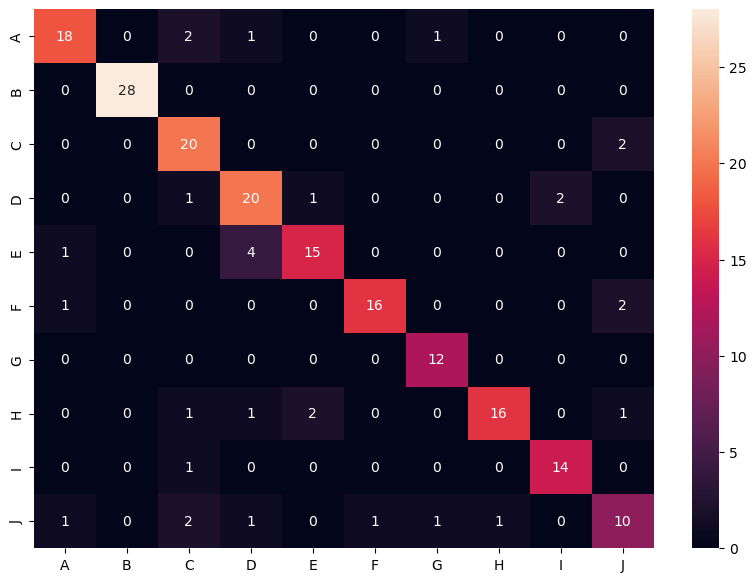

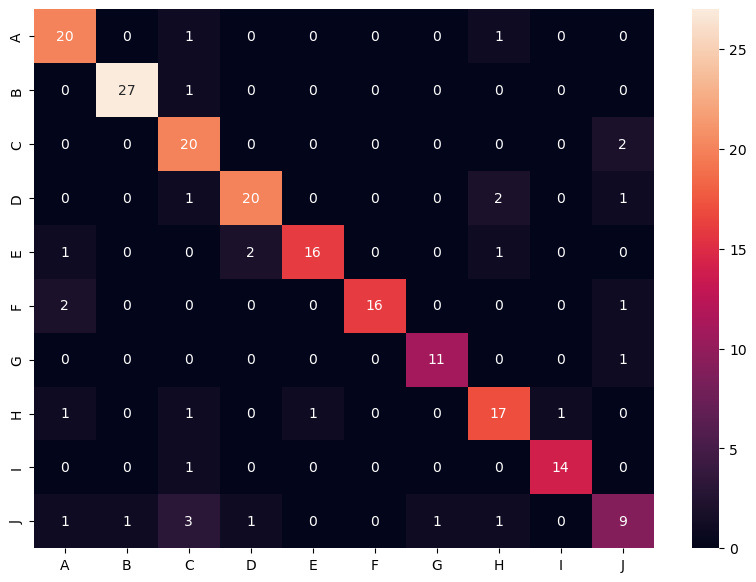

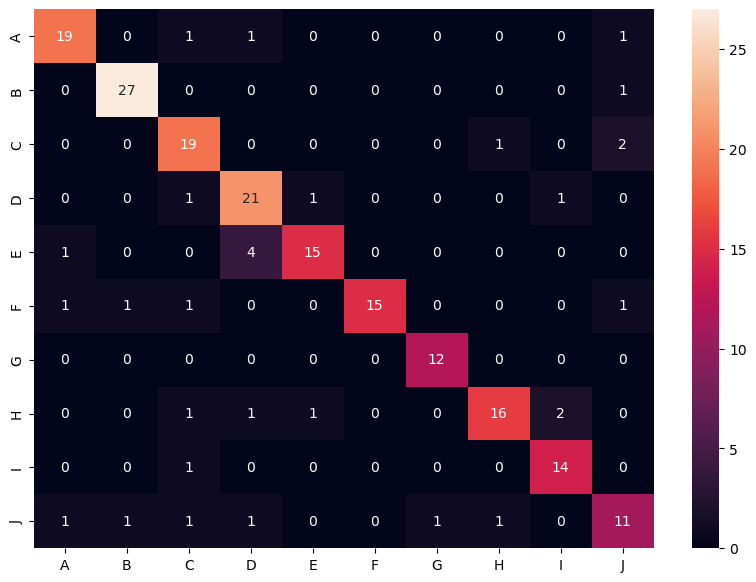

In [21]:

#graph confusion matirx
svm_cm = pd.DataFrame(svm_conf_matrix, index = [i for i in "ABCDEFGHIJ"],
                  columns = [i for i in "ABCDEFGHIJ"])
plt.figure(figsize = (10,7))
sn.heatmap(svm_cm, annot=True)
plt.show

svm_rf = pd.DataFrame(rf_conf_matrix, index = [i for i in "ABCDEFGHIJ"],
                  columns = [i for i in "ABCDEFGHIJ"])
plt.figure(figsize = (10,7))
sn.heatmap(svm_rf, annot=True)
plt.show

svm_mlp = pd.DataFrame(mlp_conf_matrix, index = [i for i in "ABCDEFGHIJ"],
                  columns = [i for i in "ABCDEFGHIJ"])
plt.figure(figsize = (10,7))
sn.heatmap(svm_mlp, annot=True)
plt.show

stacking_cm = pd.DataFrame(stacking_conf_matrix, index = [i for i in "ABCDEFGHIJ"],
                  columns = [i for i in "ABCDEFGHIJ"])
plt.figure(figsize = (10,7))
sn.heatmap(stacking_cm, annot=True)
plt.show